In [3]:
#define all relevant functions
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches


In [4]:
def read_data(file_name):
    """Reads and processes data from a given file, correctly handling filenames with 'ffX'."""
    data = []
    
    with open(file_name, 'r') as f:
        for line in f:
            l = line.split()
            
            if len(l) != 4:
                continue  # Skip lines that do not match expected format
            
            try:
                # Extract the filename and split into parts
                file_parts = l[0].split("/")[-1].split("_")

                # Remove any "ffX" component
                file_parts = [part for part in file_parts if not (part.startswith("ff") and part[2:].isdigit())]

                # Extract only the LAST 4 elements (since the earlier ones are not needed)
                U = float(file_parts[-4])   # Extracts U parameter
                J = float(file_parts[-3])   # Extracts J parameter
                nk = int(file_parts[-2])    # Extracts nk number points
                nkf = int(file_parts[-1].split(".")[0])  # Extracts nkf number points

                Tc = l[1]  # Tc value
                phase = float(l[2])  # Dominant phase
                
                # Extract time in seconds
                time_parts = l[3].split("m")
                seconds = float(time_parts[0]) * 60 + float(time_parts[1].split("s")[0])
                
                # Store data as a LIST (not dictionary)
                final_data = [U, J, nk, nkf, Tc, phase, seconds]
                data.append(final_data)
            
            except (ValueError, IndexError) as e:
                print(f"Skipping line due to error: {line.strip()} - {e}")
    
    return data
















def plot_Tc_mu(data, mus1):

    #specify U for which th Tc is plotted 
    data = read_data(data)

    nplots = len(mus1)
    fig, axs = plt.subplots(1, nplots, figsize=(26, 10))
    fig.suptitle(r"1NNN t' =0.25 model: Tc as a function of U", fontsize= 20 , y = 1.02)
    fig.tight_layout()

    for index, mus in enumerate(mus1):

        groundstate = []
        Us = []
        mu = []
        points = []
        tc = []
        nk =[]
        nkf = []
        times = []
        for d in data: 
            if d[1] == mus:
            

                Us.append(d[0])
                mu.append(d[1])
                points.append([d[2],d[3]])  #nk, nkf vector
                groundstate.append(d[4])  #Stores GS
                nk.append(d[2])
                nkf.append(d[3])
                tc.append(d[5])  #stores Tcplot_Tc("1NNN_0p75_20_5_ff4_PhaseDiagram.log", 3)
                times.append(d[6])
    
    
  

        color_map = {
            "SC": "#A7C7E7",
            "CDW": "#FFB347",
            "FL": "black",
            "SDW": "#B0E57C"
        }


        labels_added = {}

        for i in range(len(Us)):
            state = groundstate[i]
            colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
            label = state if state not in labels_added else None
            labels_added[state] = True  # Mark label as used
            axs[index].scatter(Us[i], tc[i], c=colour, s=70, marker="o", label=label)
        axs[index].plot(Us, tc, color = 'grey', ls = "--" )
        
        axs[2].legend()
        axs[index].set_xlabel("U(eV)")
        axs[0].set_ylabel("Tc(eV)")
        axs[index].set_title(f"$\mu$ = {mus}")
        axs[index].grid()

/tmp/ipykernel_22202/2296919814.py:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()


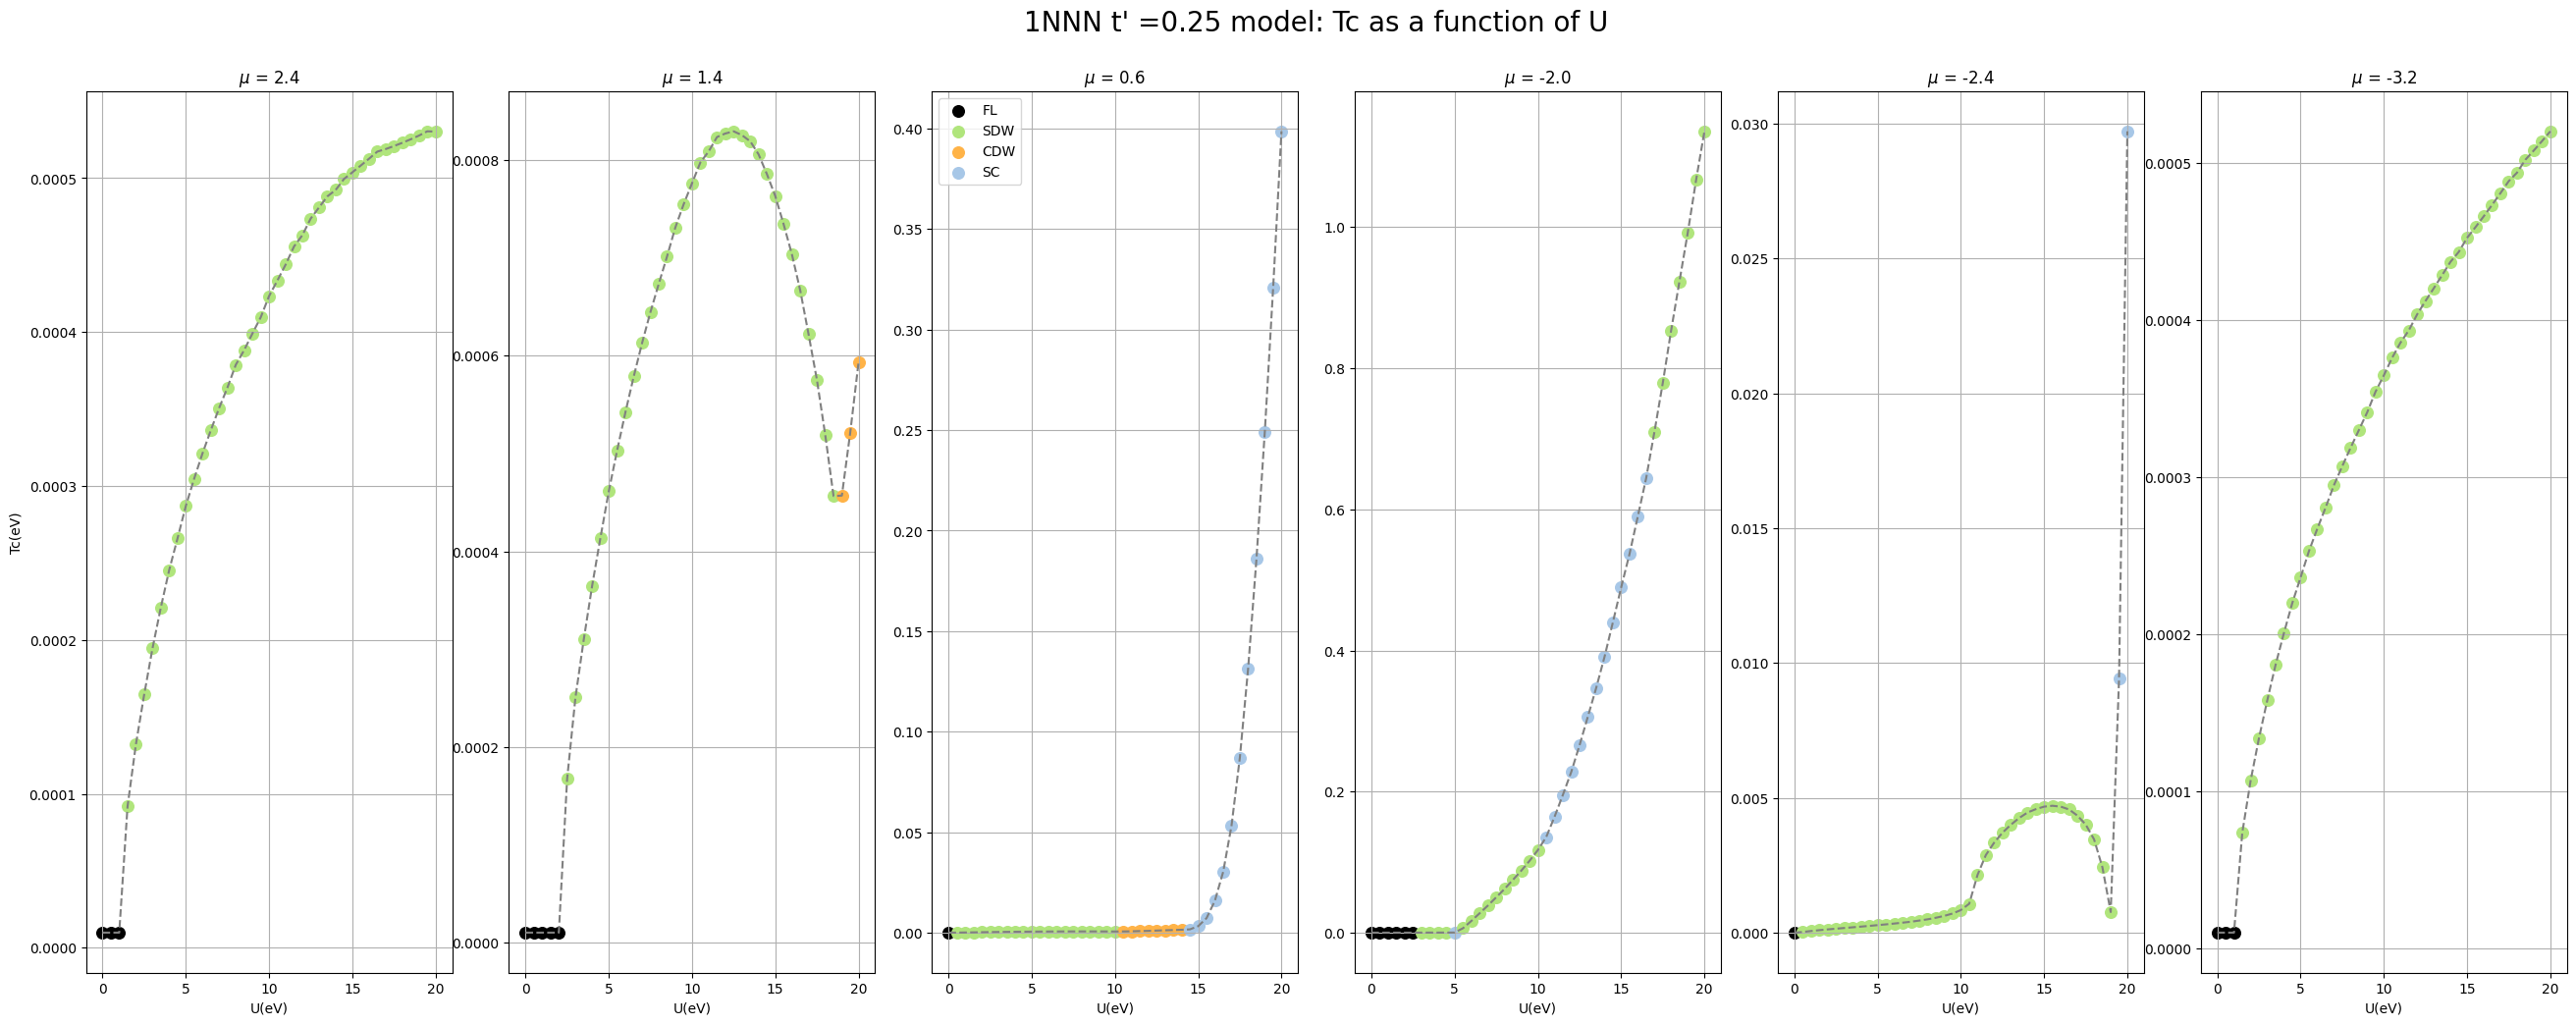

In [5]:
mus1  = [2.4, 1.4, 0.6, -2.0, -2.4, -3.2]

plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", mus1)

In [6]:
plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", 2.4)

TypeError: object of type 'float' has no len()

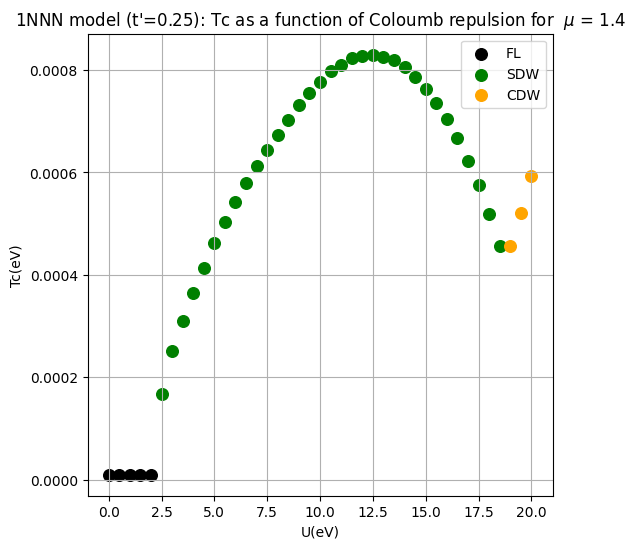

In [29]:
plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", 1.4)


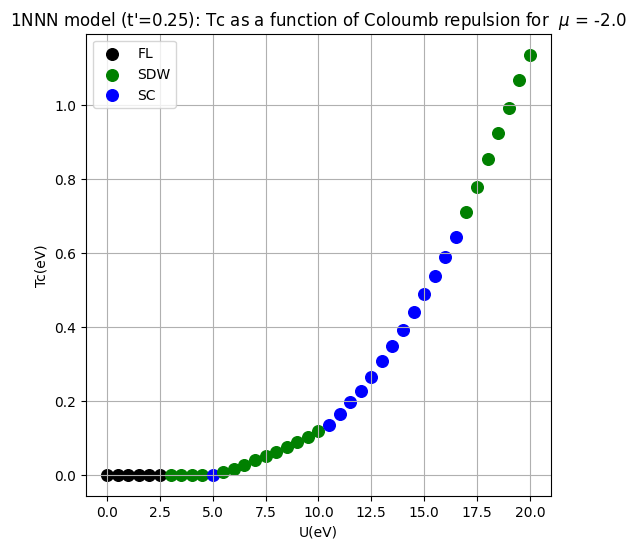

In [30]:
plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", -2.0)


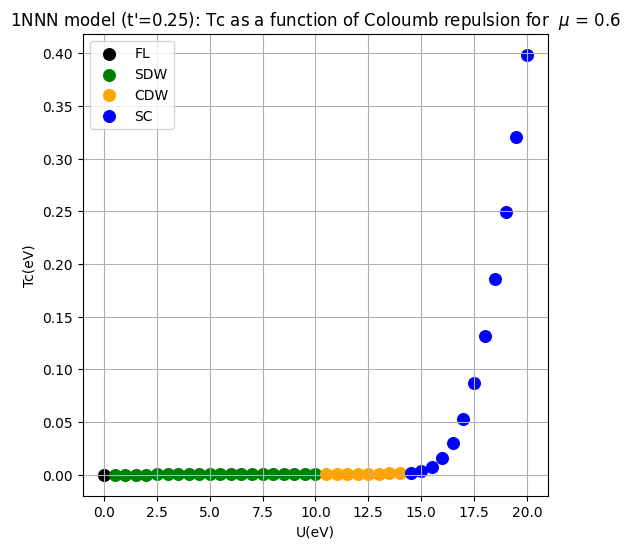

In [31]:
plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", 0.6)

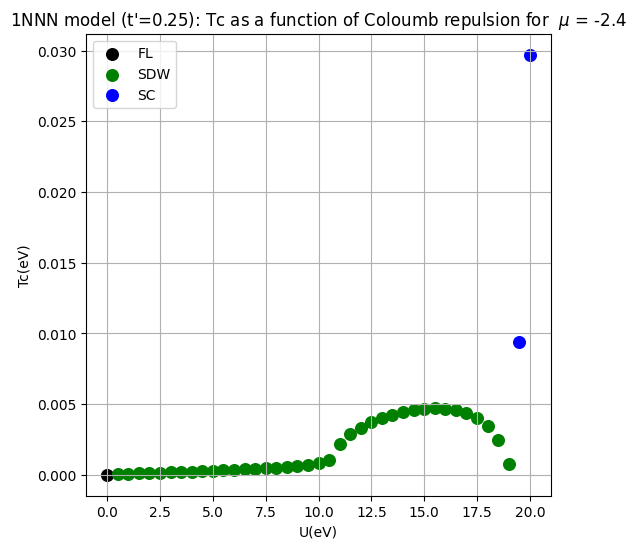

In [32]:
plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", -2.4)

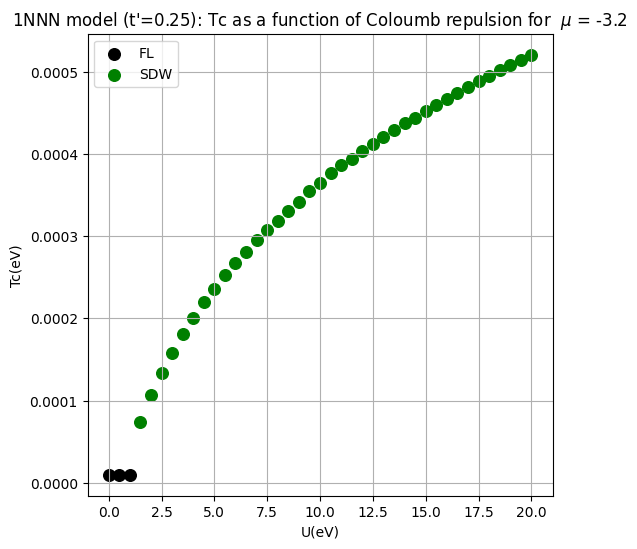

In [33]:
plot_Tc_mu("1NNN_0p25_20_5_ff4_PhaseDiagram.log", -3.2)